# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th. Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, I suggest everyone downloads the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  8322k      0 --:--:--  0:01:48 --:--:-- 6914k--  0:00:04 --:--:-- 28.0M   0 --:--:--  0:00:36 --:--:-- 8380k-  0:01:02 --:--:-- 3841k  9488k      0 --:--:--  0:01:03 --:--:-- 3333k--:--:--  0:01:08 --:--:-- 4464kk      0 --:--:--  0:01:22 --:--:-- 6746k      0 --:--:--  0:01:30 --:--:-- 10.0M-:--:--  0:01:31 --:--:-- 9675k01:40 --:--:-- 5977k


In [4]:
!rm SUSY.csv

In [5]:
!gunzip SUSY.csv.gz

In [6]:
ls -lh

total 5148104
-rw-r--r--@ 1 afarbin  staff   389K Oct 18 13:44 Lab.7.ipynb
-rw-r--r--@ 1 afarbin  staff   5.8M Oct 18 12:45 Lab.7.pdf
-rw-r--r--@ 1 afarbin  staff   228M Oct 18 12:39 SUSY-small.csv
-rw-r--r--  1 afarbin  staff   2.2G Oct 18 13:43 SUSY.csv


The data is provided as a comma separated file.

In [2]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [7]:
!ls -lh

total 5148104
-rw-r--r--@ 1 afarbin  staff   389K Oct 18 13:44 Lab.7.ipynb
-rw-r--r--@ 1 afarbin  staff   5.8M Oct 18 12:45 Lab.7.pdf
-rw-r--r--@ 1 afarbin  staff   228M Oct 18 12:39 SUSY-small.csv
-rw-r--r--  1 afarbin  staff   2.2G Oct 18 13:43 SUSY.csv


We see that we have 5 million datapoints.

In [5]:
!wc -l SUSY.csv

 5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [10]:
!head -500000 SUSY.csv > SUSY-small.csv

In [11]:
ls -lh

total 5173504
-rw-r--r--@ 1 afarbin  staff   387K Mar 29 11:08 Lab.7.ipynb
-rw-r--r--@ 1 afarbin  staff   6.1M Mar 18 10:38 Lab.7.pdf
-rw-r--r--@ 1 afarbin  staff   228M Mar 29 11:09 SUSY-small.csv
-rw-r--r--@ 1 afarbin  staff   2.2G Mar 18 10:38 SUSY.csv


In [12]:
! wc -l SUSY-small.csv

  500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [4]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [5]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [6]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [7]:
FeatureNames

['axial_MET',
 'MET_rel',
 'M_R',
 'cos_theta_r1',
 'MT2',
 'dPhi_r_b',
 'M_TR_2',
 'R',
 'S_R',
 'M_Delta_R']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [10]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [11]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [11]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


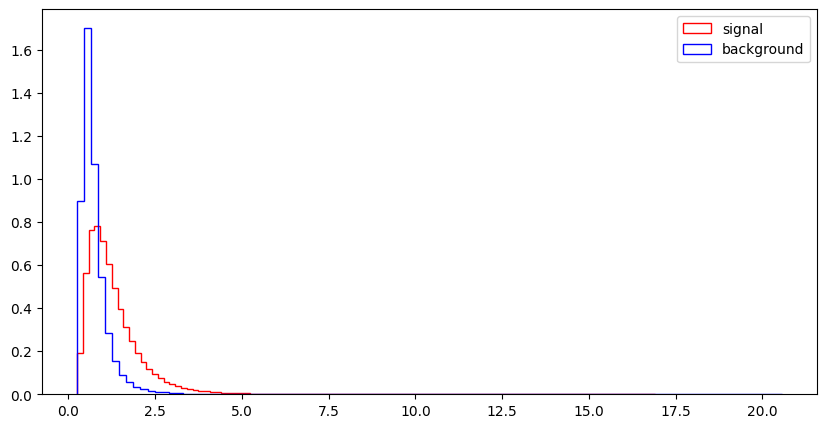

l_1_eta


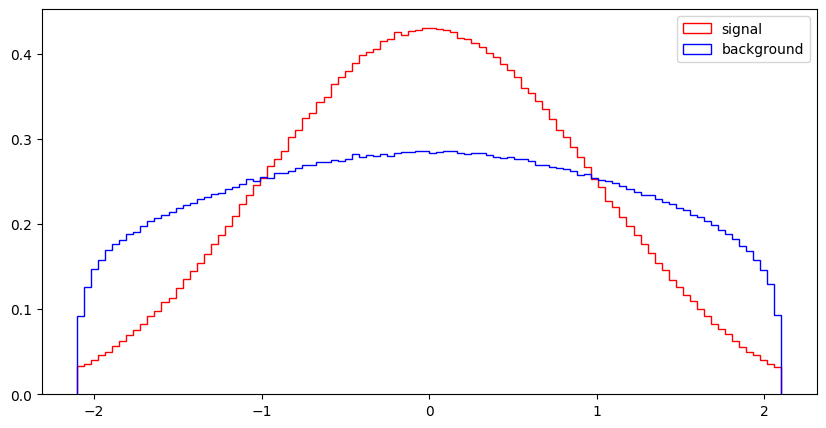

l_1_phi


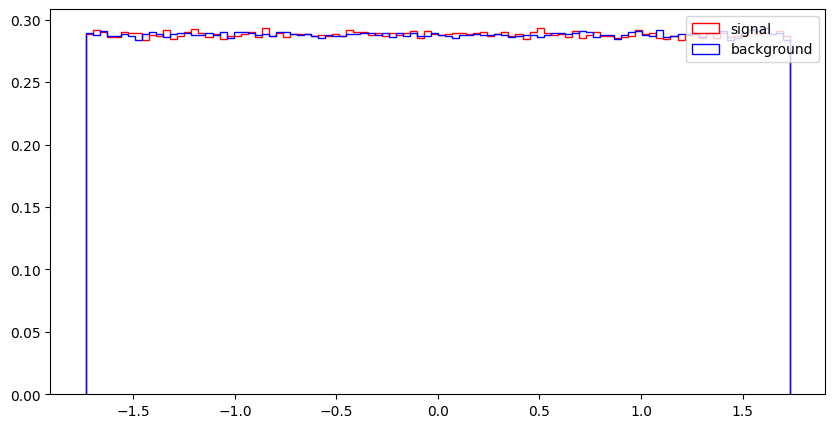

l_2_pT


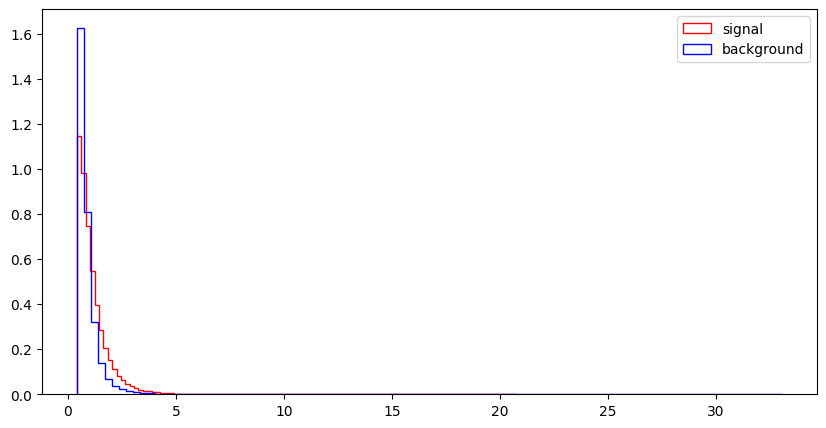

l_2_eta


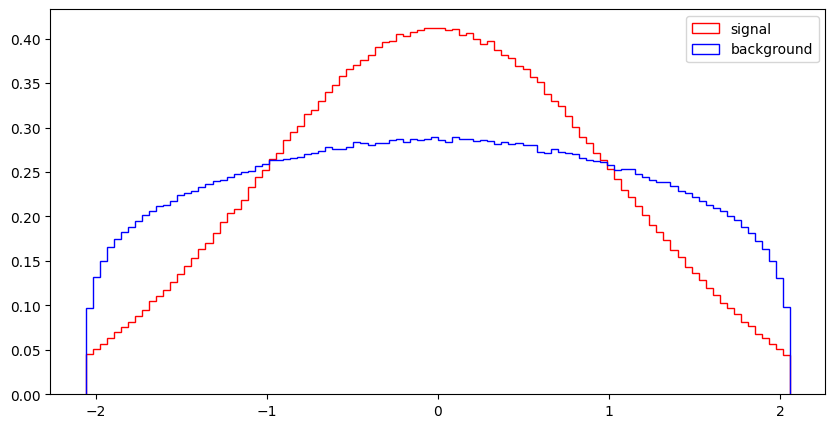

l_2_phi


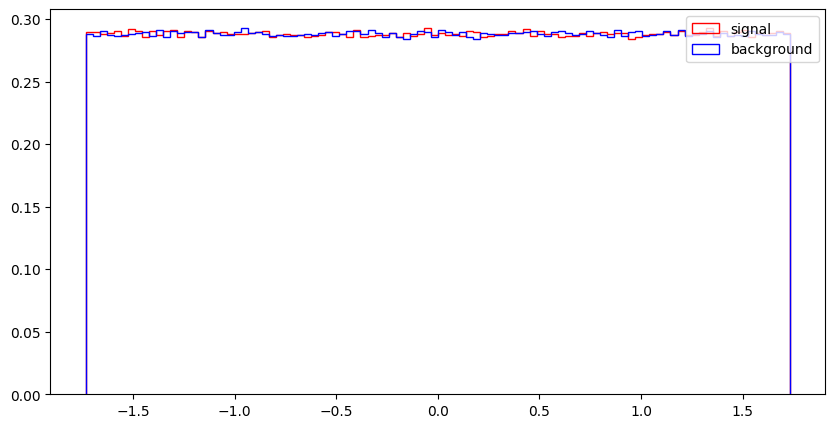

MET


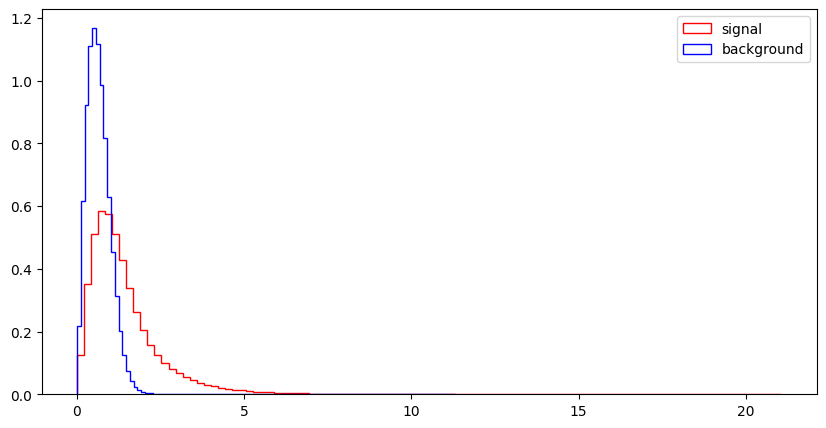

MET_phi


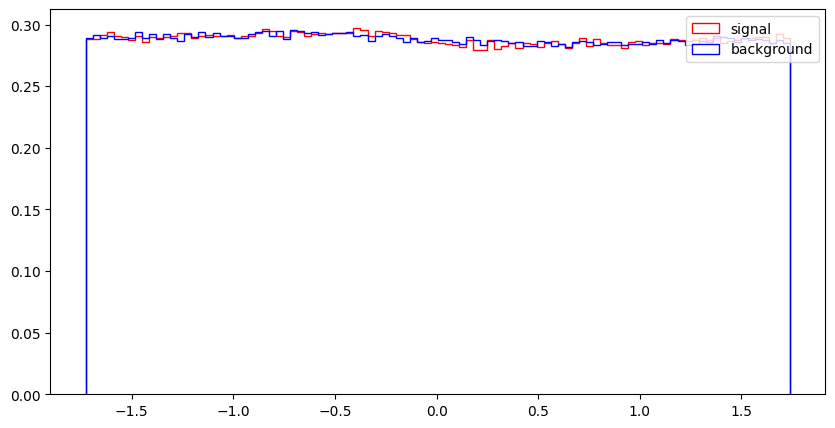

MET_rel


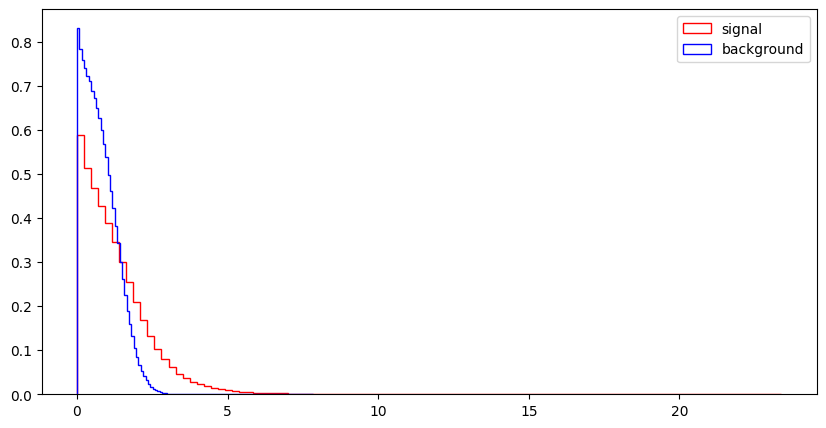

axial_MET


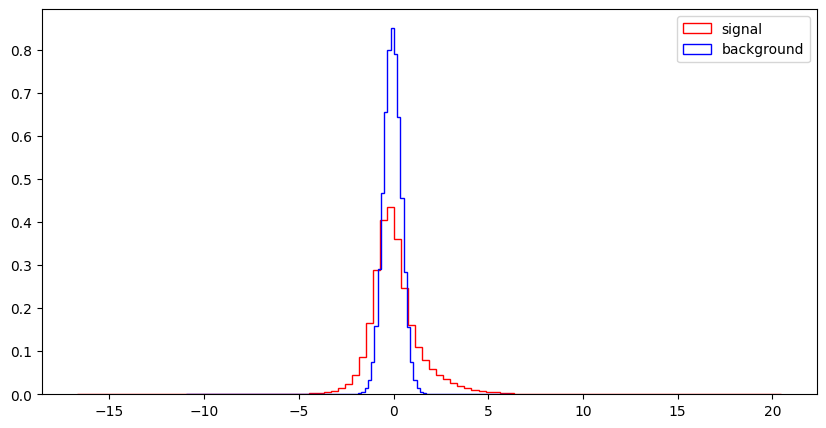

M_R


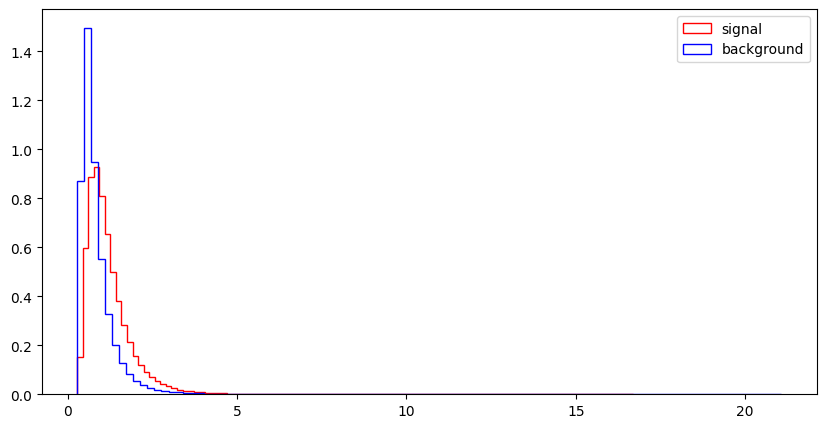

M_TR_2


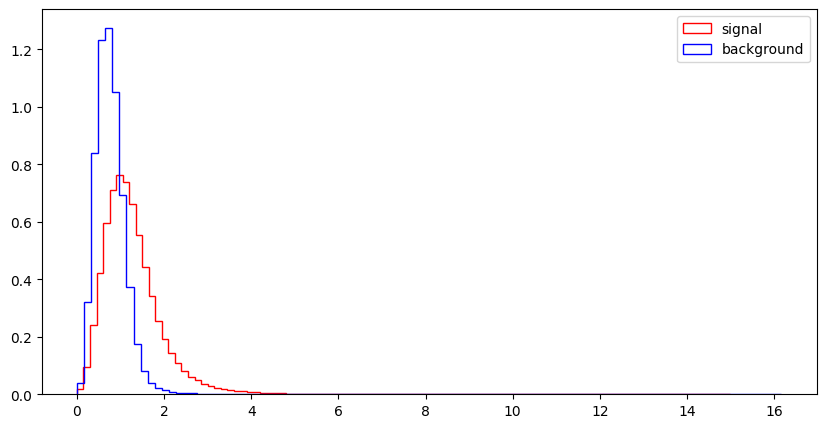

R


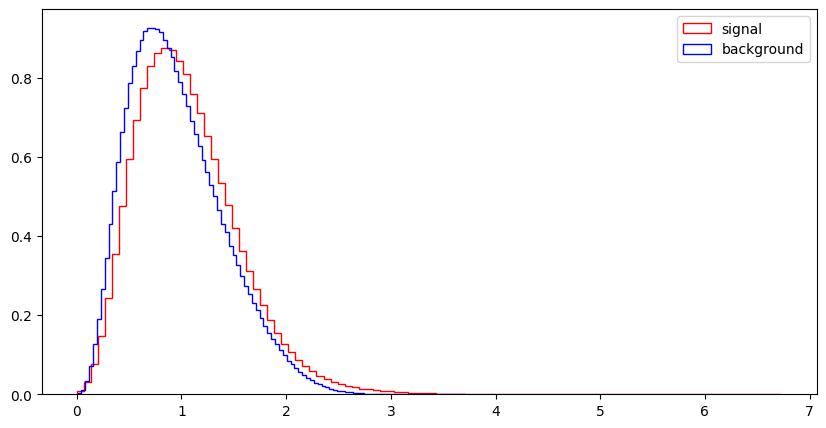

MT2


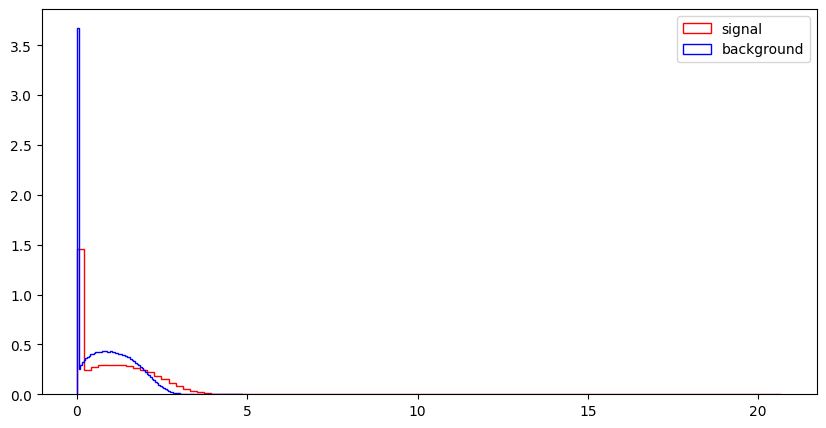

S_R


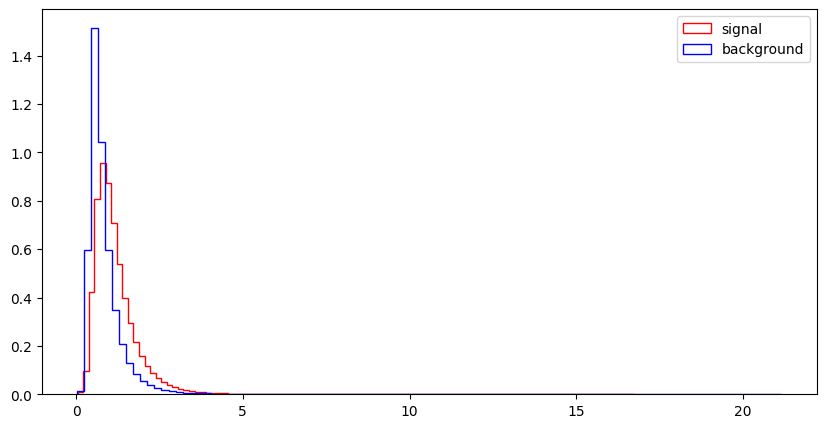

M_Delta_R


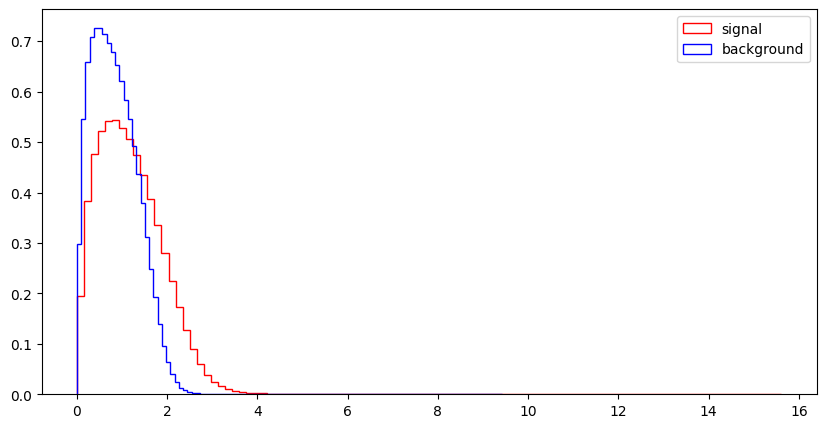

dPhi_r_b


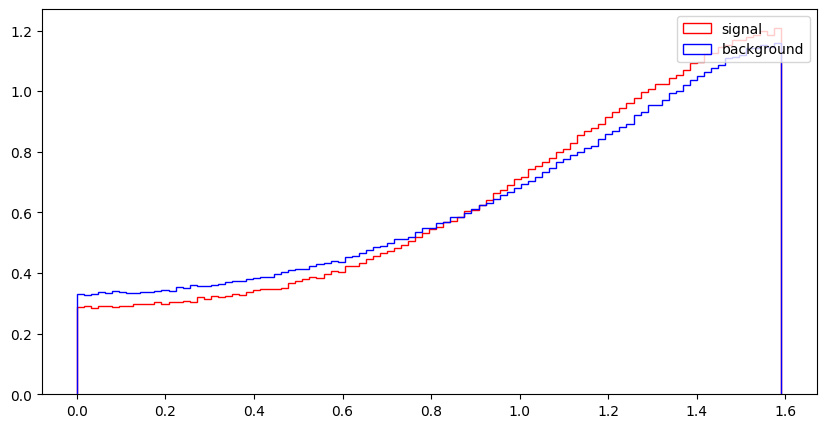

cos_theta_r1


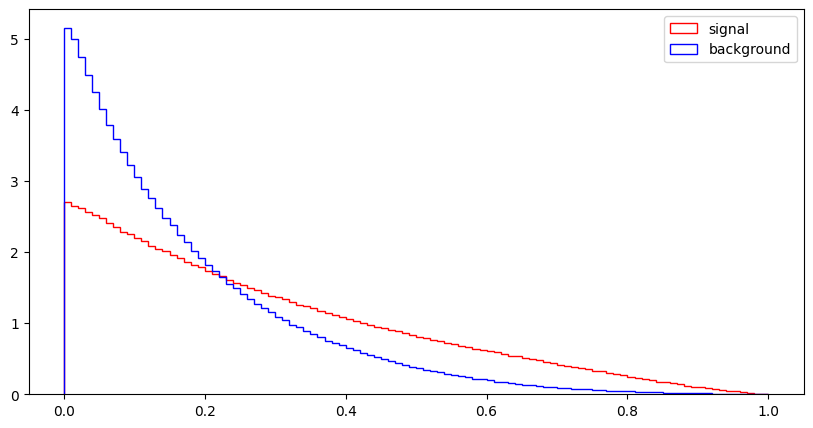

In [13]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

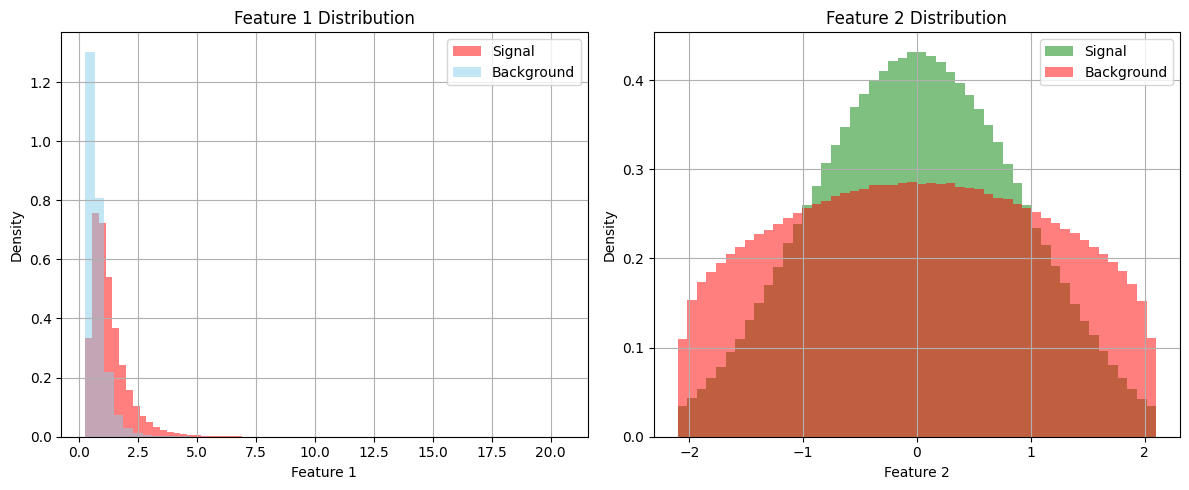

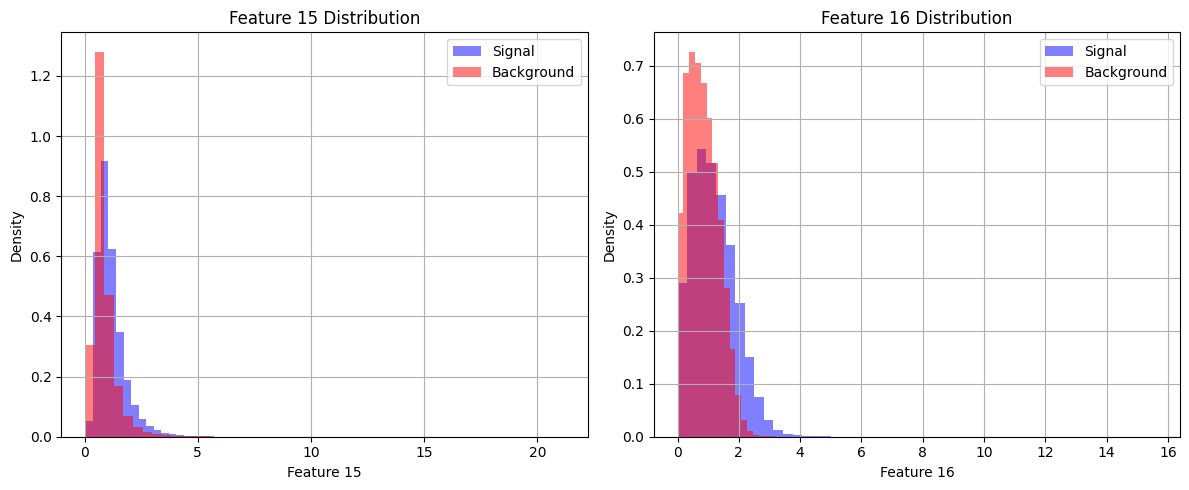

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("SUSY.csv", header=None)

signal=df[df[0]==1]
background=df[df[0]==0]

low_level_feature_1 = 1  
low_level_feature_2 = 2  
high_level_feature_1 = 15  
high_level_feature_2 = 16  

fig, axes=plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(signal[low_level_feature_1], bins=50, alpha=0.5, label="Signal", density=True, color='red')
axes[0].hist(background[low_level_feature_1], bins=50, alpha=0.5, label="Background", density=True, color='skyblue')
axes[0].set_xlabel(f"Feature {low_level_feature_1}")
axes[0].set_ylabel("Density")
axes[0].set_title(f"Feature {low_level_feature_1} Distribution")
axes[0].legend()
axes[0].grid(True)

axes[1].hist(signal[low_level_feature_2], bins=50, alpha=0.5, label="Signal", density=True, color='green')
axes[1].hist(background[low_level_feature_2], bins=50, alpha=0.5, label="Background", density=True, color='red')
axes[1].set_xlabel(f"Feature {low_level_feature_2}")
axes[1].set_ylabel("Density")
axes[1].set_title(f"Feature {low_level_feature_2} Distribution")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

fig, axes=plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(signal[high_level_feature_1], bins=50, alpha=0.5, label="Signal", density=True, color='blue')
axes[0].hist(background[high_level_feature_1], bins=50, alpha=0.5, label="Background", density=True, color='red')
axes[0].set_xlabel(f"Feature {high_level_feature_1}")
axes[0].set_ylabel("Density")
axes[0].set_title(f"Feature {high_level_feature_1} Distribution")
axes[0].legend()
axes[0].grid(True)

axes[1].hist(signal[high_level_feature_2], bins=50, alpha=0.5, label="Signal", density=True, color='blue')
axes[1].hist(background[high_level_feature_2], bins=50, alpha=0.5, label="Background", density=True, color='red')
axes[1].set_xlabel(f"Feature {high_level_feature_2}")
axes[1].set_ylabel("Density")
axes[1].set_title(f"Feature {high_level_feature_2} Distribution")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

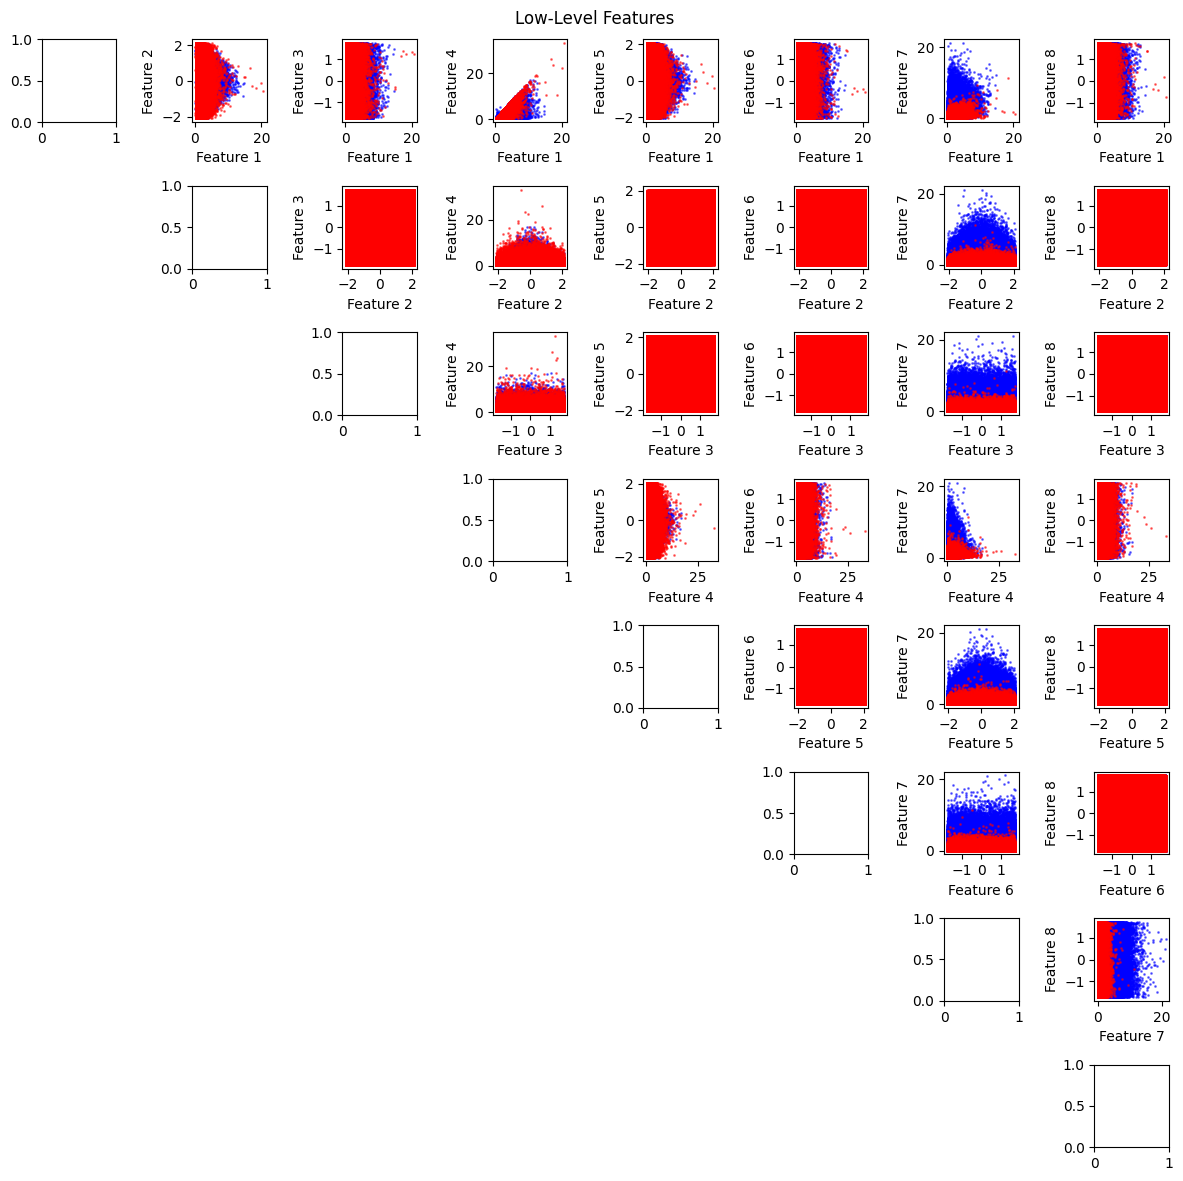

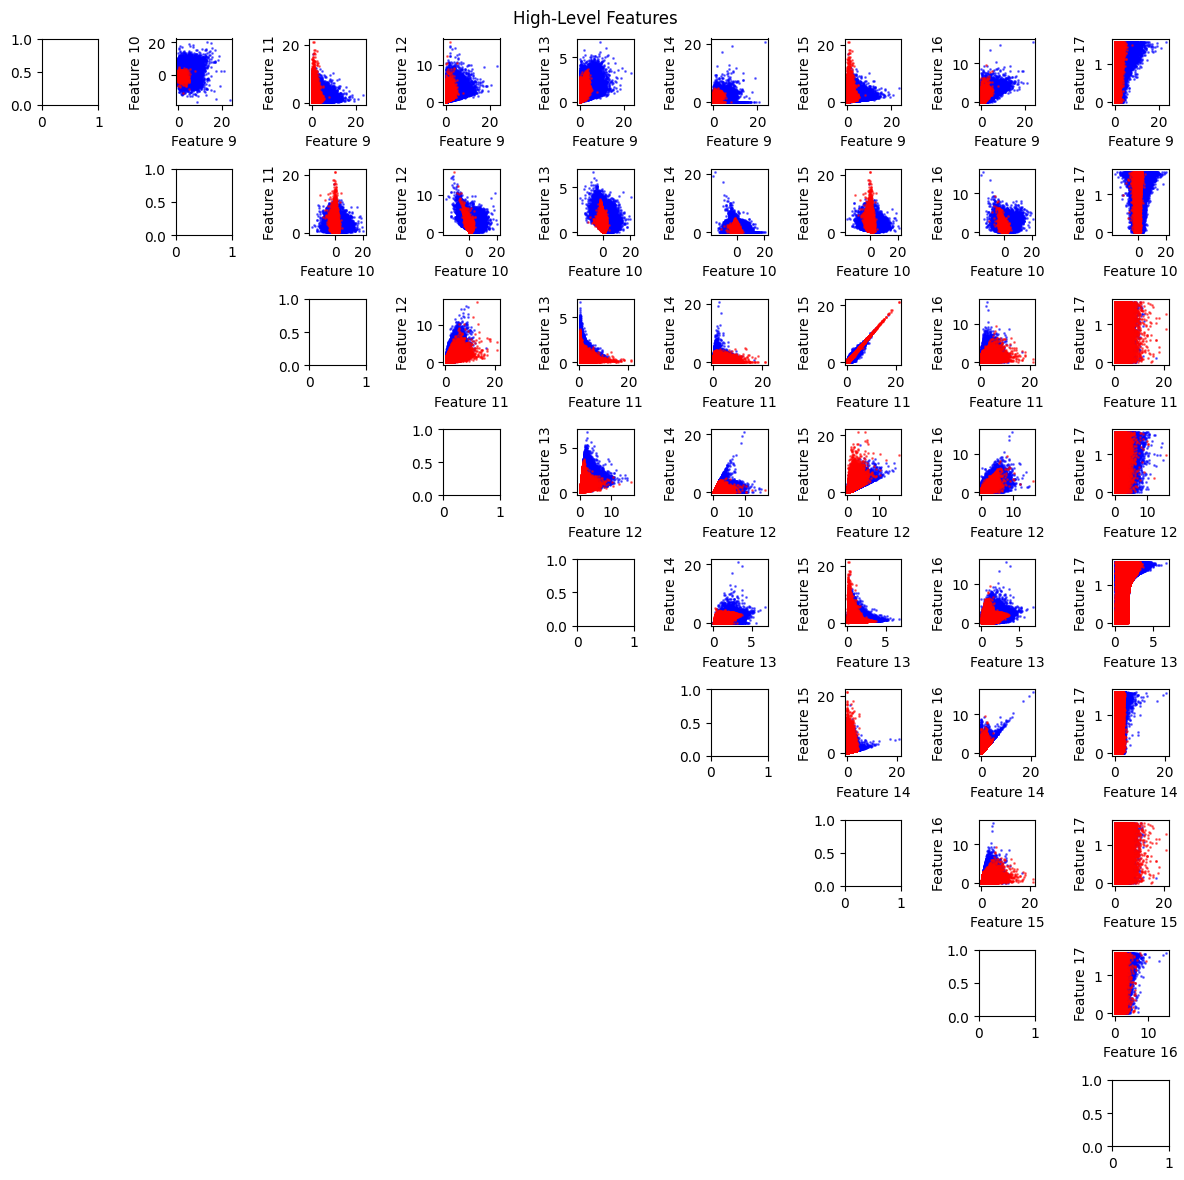

In [7]:
# a 
import pandas as pd
import matplotlib.pyplot as plt
import itertools

df=pd.read_csv("SUSY.csv", header=None)

signal=df[df[0]==1]
background=df[df[0]==0]

low_level_features=list(range(1, 9))  
high_level_features=list(range(9, 18)) 

def pair_plot(features, title):
    num_features=len(features)
    fig, axes=plt.subplots(num_features, num_features, figsize=(12, 12))

    for i, j in itertools.combinations(features, 2): 
        row, col = features.index(i), features.index(j)

        axes[row, col].scatter(signal[i], signal[j], s=1, color='blue', alpha=0.5, label="Signal")
        axes[row, col].scatter(background[i], background[j], s=1, color='red', alpha=0.5, label="Background")

        axes[row, col].set_xlabel(f"Feature {i}")
        axes[row, col].set_ylabel(f"Feature {j}")

        axes[col, row].axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

pair_plot(low_level_features, "Low-Level Features")
pair_plot(high_level_features, "High-Level Features")


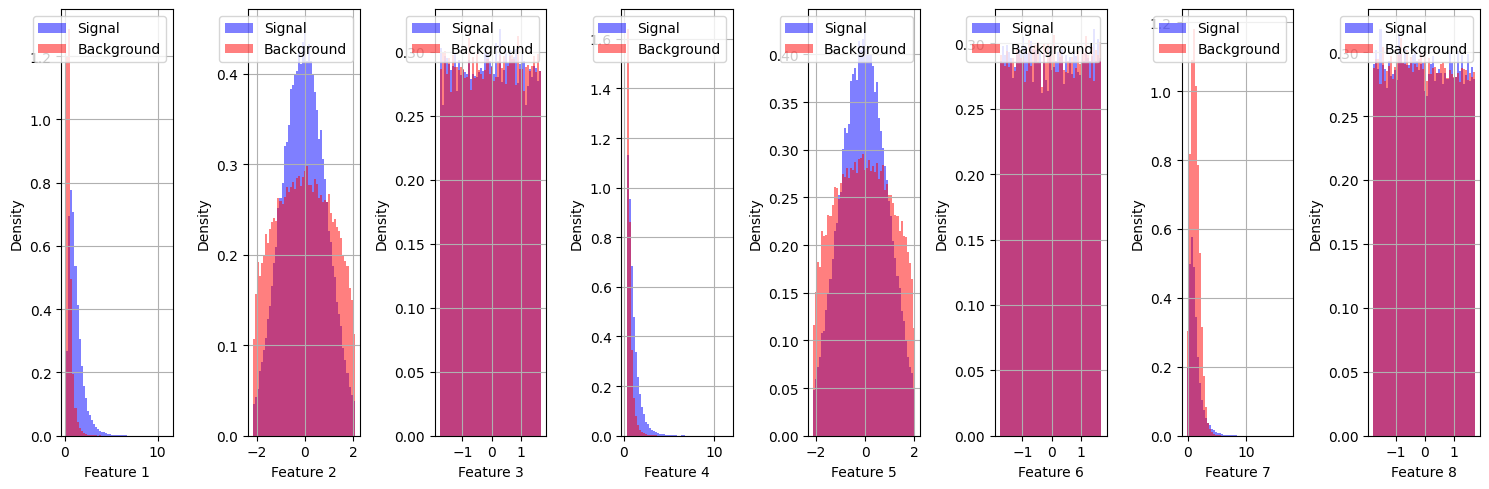

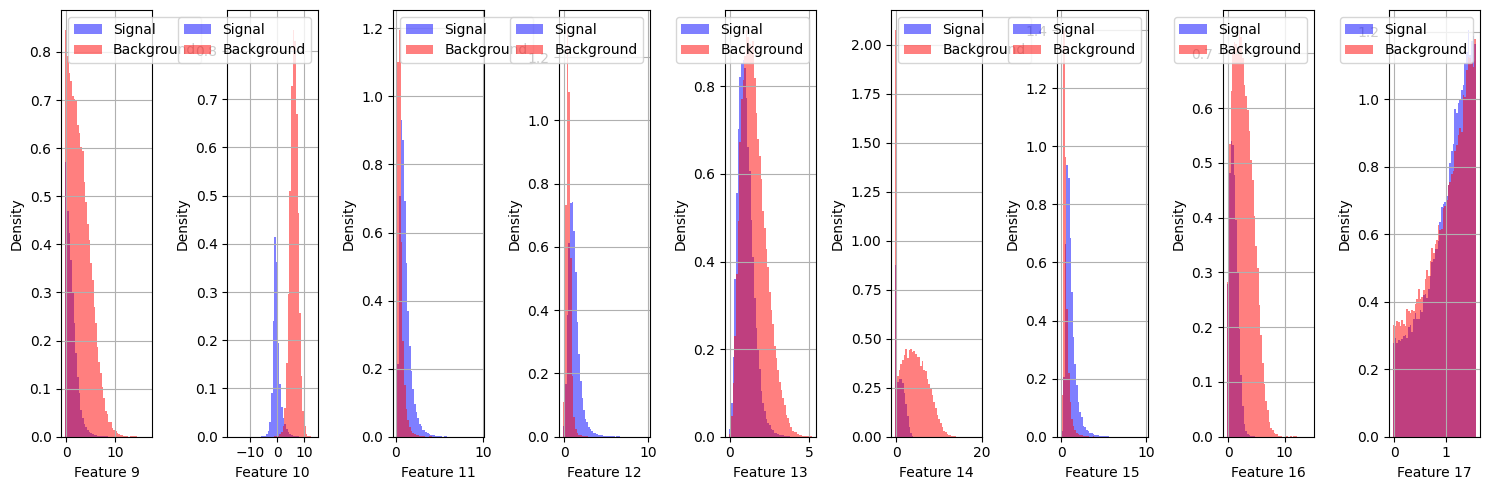

In [11]:
# b 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

df=pd.read_csv("SUSY.csv", header=None)

signal=df[df[0]==1]
background=df[df[0]==0]

low_level_features=list(range(1, 9))  
high_level_features=list(range(9, 18)) 

def fast_histogram(features, bins=50, sample_size=50000):
    signal_sample = signal.sample(sample_size, random_state=42)
    background_sample = background.sample(sample_size, random_state=42)

    fig, axes = plt.subplots(1, len(features), figsize=(15, 5))

    for i, feature in enumerate(features):
        signal_hist, bin_edges = np.histogram(signal_sample[feature], bins=bins, density=True)
        background_hist, _ = np.histogram(background_sample[feature], bins=bins, density=True)

        axes[i].bar(bin_edges[:-1], signal_hist, width=np.diff(bin_edges), alpha=0.5, label="Signal", color='blue')
        axes[i].bar(bin_edges[:-1], background_hist, width=np.diff(bin_edges), alpha=0.5, label="Background", color='red')

        axes[i].set_xlabel(f"Feature {feature}")
        axes[i].set_ylabel("Density")
        axes[i].legend()
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

fast_histogram(low_level_features)
fast_histogram(high_level_features)


In [ ]:
# C: A has less overlap and seperates the two colors more effectively

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [12]:
# a 
!pip install tabulate 

In [15]:
print(df.columns)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64')


In [17]:
# b 
import numpy as np

low_level_features=[1, 2, 3, 4, 5, 6, 7, 8, 9] 
high_level_features=[10, 11, 12, 13, 14, 15, 16, 17, 18] 

low_level_data=df[low_level_features].values  
high_level_data=df[high_level_features].values 

cov_low_level=np.cov(low_level_data, rowvar=False)
cov_high_level=np.cov(high_level_data, rowvar=False)

corr_low_level=np.corrcoef(low_level_data, rowvar=False) 
corr_high_level=np.corrcoef(high_level_data, rowvar=False)

# For Covariance 
print("Covariance Matrix for Low-Level Features:")
print(cov_low_level)

print("\nCovariance Matrix for High-Level Features:")
print(cov_high_level)

# For Correlation 
print("\nCorrelation Matrix for Low-Level Features:")
print(corr_low_level)

print("\nCorrelation Matrix for High-Level Features:")
print(corr_high_level)


Covariance Matrix for Low-Level Features:
[[ 4.72419060e-01 -2.75386540e-04 -7.44408986e-05  3.07724419e-01
  -4.86395001e-04 -2.85688547e-04  2.31186224e-01 -6.94631997e-04
   9.96224495e-02]
 [-2.75386540e-04  1.00579281e+00 -7.52691561e-05 -4.47542332e-04
   4.05777442e-01 -6.05139513e-05 -9.05885120e-04 -3.52155857e-04
  -1.54485558e-03]
 [-7.44408986e-05 -7.52691561e-05  1.00370395e+00 -9.21735177e-05
   3.83494467e-04 -2.67887229e-01  1.66652095e-03 -1.84257083e-01
   1.91115487e-03]
 [ 3.07724419e-01 -4.47542332e-04 -9.21735177e-05  4.27831742e-01
  -6.42215206e-04 -4.08021335e-04  7.97773141e-02 -1.34129007e-03
  -1.73193568e-03]
 [-4.86395001e-04  4.05777442e-01  3.83494467e-04 -6.42215206e-04
   1.00531682e+00 -5.29496797e-04 -1.61445747e-04 -4.05607410e-04
  -3.71668965e-05]
 [-2.85688547e-04 -6.05139513e-05 -2.67887229e-01 -4.08021335e-04
  -5.29496797e-04  1.00287030e+00 -4.99247707e-04 -3.46703672e-02
   3.61818723e-04]
 [ 2.31186224e-01 -9.05885120e-04  1.66652095e-03  7

Hint: Example code for embedding a `tabulate` table into a notebook:

In [15]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

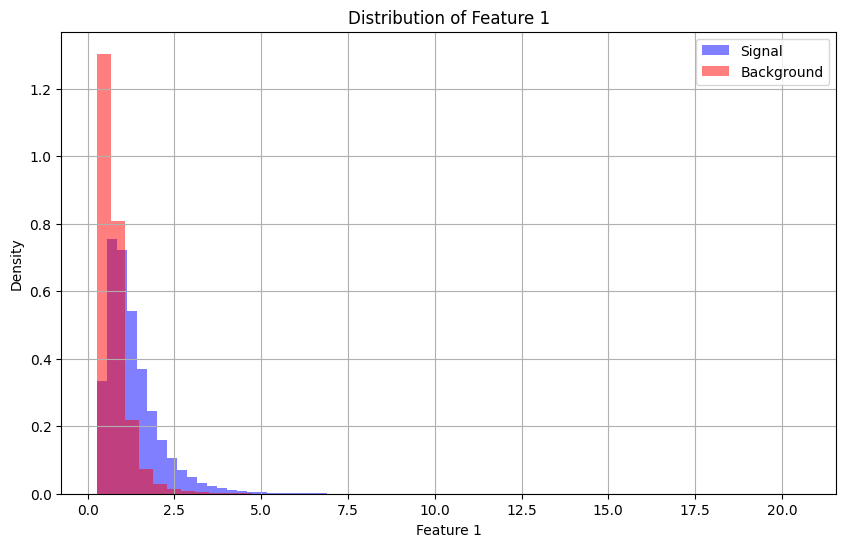

x>x_c1: 2.8991852618166343
x<x_c2: -0.3182882712621151
|x-mu|>x_c3: 1.6087367665393746
|x-mu|<x_c4: 0.8043683832696873


In [22]:
# 5.1

feature=1 

signal_data=signal[feature].values
background_data=background[feature].values

signal_mean=np.mean(signal_data)
signal_std=np.std(signal_data)
background_mean=np.mean(background_data)
background_std=np.std(background_data)

plt.figure(figsize=(10, 6))
plt.hist(signal_data, bins=50, alpha=0.5, label="Signal", density=True, color='blue')
plt.hist(background_data, bins=50, alpha=0.5, label="Background", density=True, color='red')
plt.xlabel(f"Feature {feature}")
plt.ylabel("Density")
plt.legend()
plt.title(f"Distribution of Feature {feature}")
plt.grid(True)
plt.show()


# 1. x>xc
x_c1=signal_mean + 2 * signal_std
print(f"x>x_c1: {x_c1}")

# 2. x<xc
x_c2=signal_mean - 2 * signal_std
print(f"x<x_c2: {x_c2}")

# 3. |x-mu|>xc
x_c3 = 2 * signal_std
print(f"|x-mu|>x_c3: {x_c3}")

# 4. |x-mu|<xc
x_c4 = signal_std
print(f"|x-mu|<x_c4: {x_c4}")

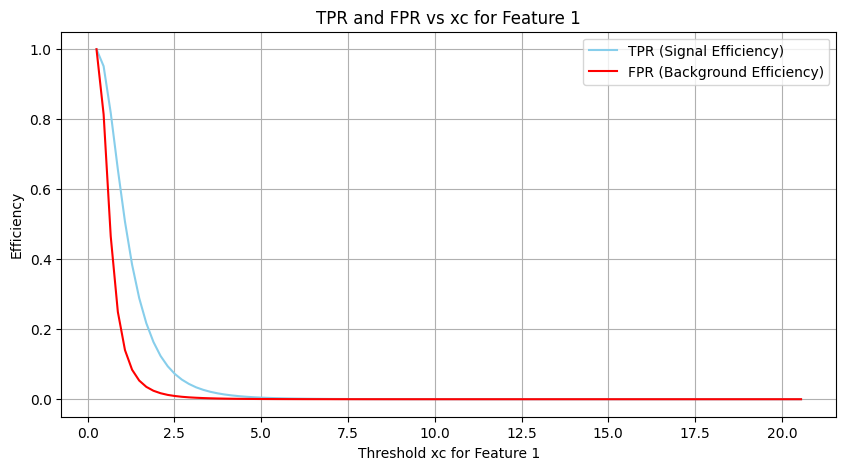

In [24]:
# 5.2 

def compute_tpr_fpr(feature, signal, background):
    x_values=np.linspace(min(signal[feature].min(), background[feature].min()), 
                         max(signal[feature].max(), background[feature].max()), 100)
    
    tpr_values=[]
    fpr_values=[]

    for xc in x_values:
        tpr=np.sum(signal[feature]>xc)/len(signal[feature])
        fpr=np.sum(background[feature]>xc)/len(background[feature])

        tpr_values.append(tpr)
        fpr_values.append(fpr)

    plt.figure(figsize=(10,5))
    plt.plot(x_values, tpr_values, label="TPR (Signal Efficiency)", color="skyblue")
    plt.plot(x_values, fpr_values, label="FPR (Background Efficiency)", color="red")
    plt.xlabel(f"Threshold xc for Feature {feature}")
    plt.ylabel("Efficiency")
    plt.legend()
    plt.title(f"TPR and FPR vs xc for Feature {feature}")
    plt.grid(True)
    plt.show()

feature=1
compute_tpr_fpr(feature, signal, background)


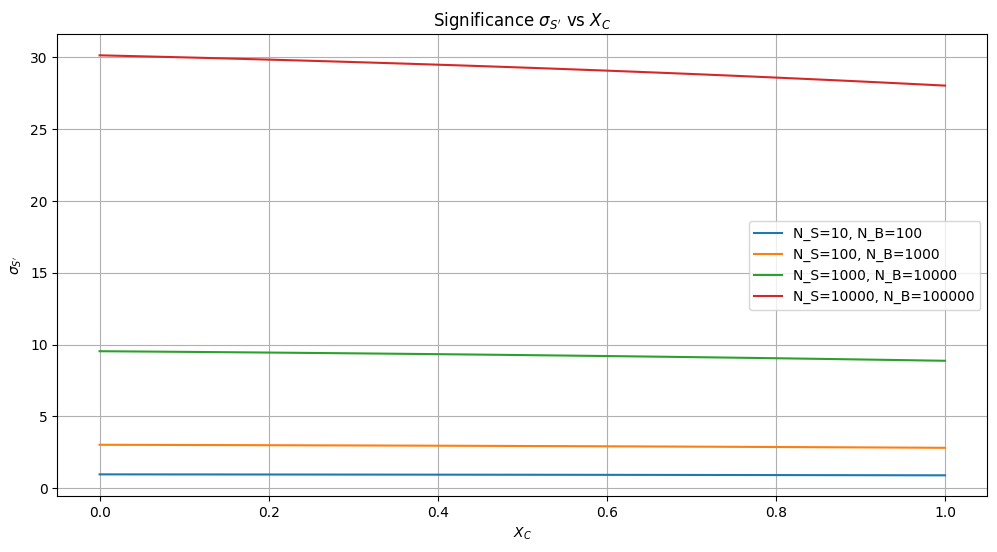

In [27]:
# 5.3 
xc_values=np.linspace(0,1,100)
epsilon_S=np.exp(-xc_values)
epsilon_B=np.exp(-2*xc_values) 
scenarios=[(10,100),(100,1000),(1000,10000),(10000,100000)]

plt.figure(figsize=(12,6))

for N_S,N_B in scenarios:
    N_S_prime=epsilon_S*N_S
    N_B_prime=epsilon_B*N_B
    sigma_S_prime=N_S_prime/np.sqrt(N_S_prime+N_B_prime)
    
    plt.plot(xc_values,sigma_S_prime,label=f"N_S={N_S}, N_B={N_B}")

plt.xlabel(r"$X_C$")
plt.ylabel(r"$\sigma_{S'}$")
plt.title(r"Significance $\sigma_{S'}$ vs $X_C$")
plt.legend()
plt.grid(True)
plt.show()

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [31]:
# 6.1 
observable_1=0 
observable_2=1
observable_3=2 

x_c1=0.3
x_c2=0.5 
x_c3=0.7 

selected_signal_1=signal[signal[observable_1]>x_c1]
selected_background_1=background[background[observable_1]>x_c1]

selected_signal_2=signal[signal[observable_2]>x_c2]
selected_background_2=background[background[observable_2]>x_c2]

selected_signal_3=signal[signal[observable_3]>x_c3]
selected_background_3=background[background[observable_3]>x_c3]

selected_signal=pd.concat([selected_signal_1, selected_signal_2, selected_signal_3])
selected_background=pd.concat([selected_background_1, selected_background_2, selected_background_3])

print(f"Selected Signal (first few rows):\n{selected_signal.head()}")
print(f"\nSelected Background (first few rows):\n{selected_background.head()}")


Selected Signal (first few rows):
    0         1         2         3         4         5         6         7   \
1  1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543  3.475464   
2  1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661  1.219918   
3  1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328  2.033060   
4  1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907  1.087562   
8  1.0  2.112812  0.742983 -0.330539  0.805253 -0.028887 -1.446679  2.299946   

         8         9         10        11        12        13        14  \
1 -1.219136  0.012955  3.775174  1.045977  0.568051  0.481928  0.000000   
2  0.504026  1.831248 -0.431385  0.526283  0.941514  1.587535  2.024308   
3  1.533041  3.046260 -1.005285  0.569386  1.015211  1.582217  1.551914   
4 -0.381742  0.589204  1.365479  1.179295  0.968218  0.728563  0.000000   
8  1.450429  2.989110 -1.894770  1.445125  2.548166  1.564721  2.393632   

         15        16        17   

In [35]:
# 6.2 
observables=[0, 1, 2]
cut_values=[0.2, 0.4, 0.6]

scenarios=[(10, 100), (100, 1000), (1000, 10000), (10000, 100000)]

cut_flow_results=[]

for N_S, N_B in scenarios:
    selected_signal=signal.copy()
    selected_background=background.copy()
    
    scenario_results={
        'Scenario': f'N_S={N_S}, N_B={N_B}'
    }
    
    for i, observable in enumerate(observables):
        threshold=cut_values[i]
        
        selected_signal=selected_signal[selected_signal[observable]>threshold]
        selected_background=selected_background[selected_background[observable] > threshold]
        
        epsilon_S=len(selected_signal)/N_S
        epsilon_B=len(selected_background)/N_B
        N_S_prime=len(selected_signal)
        N_B_prime=len(selected_background)
        sigma_S_prime=N_S_prime/np.sqrt(N_S_prime+N_B_prime) if N_S_prime+N_B_prime>0 else 0
        
        scenario_results[f'feature_{observable}_epsilon_S']=epsilon_S
        scenario_results[f'feature_{observable}_epsilon_B']=epsilon_B
        scenario_results[f'feature_{observable}_N_S_prime']=N_S_prime
        scenario_results[f'feature_{observable}_N_B_prime']=N_B_prime
        scenario_results[f'feature_{observable}_sigma_S_prime']=sigma_S_prime
    
    cut_flow_results.append(scenario_results)

cut_flow_df=pd.DataFrame(cut_flow_results)

print(cut_flow_df)

                Scenario  feature_0_epsilon_S  feature_0_epsilon_B  \
0        N_S=10, N_B=100          138309.3000                  0.0   
1      N_S=100, N_B=1000           13830.9300                  0.0   
2    N_S=1000, N_B=10000            1383.0930                  0.0   
3  N_S=10000, N_B=100000             138.3093                  0.0   

   feature_0_N_S_prime  feature_0_N_B_prime  feature_0_sigma_S_prime  \
0              1383093                    0              1176.049744   
1              1383093                    0              1176.049744   
2              1383093                    0              1176.049744   
3              1383093                    0              1176.049744   

   feature_1_epsilon_S  feature_1_epsilon_B  feature_1_N_S_prime  \
0          135030.8000                  0.0              1350308   
1           13503.0800                  0.0              1350308   
2            1350.3080                  0.0              1350308   
3             13

Feature_0 signal stats:
count    1383093.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: feature_0, dtype: float64
Feature_0 background stats:
count    1639443.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: feature_0, dtype: float64
Feature_1 signal stats:
count    1.383093e+06
mean     1.290448e+00
std      8.043687e-01
min      2.551743e-01
25%      7.515828e-01
50%      1.086086e+00
75%      1.589297e+00
max      1.469271e+01
Name: feature_1, dtype: float64
Feature_1 background stats:
count    1.639443e+06
mean     7.553291e-01
std      4.405630e-01
min      2.548815e-01
25%      4.959336e-01
50%      6.413000e-01
75%      8.691101e-01
max      2.055345e+01
Name: feature_1, dtype: float64


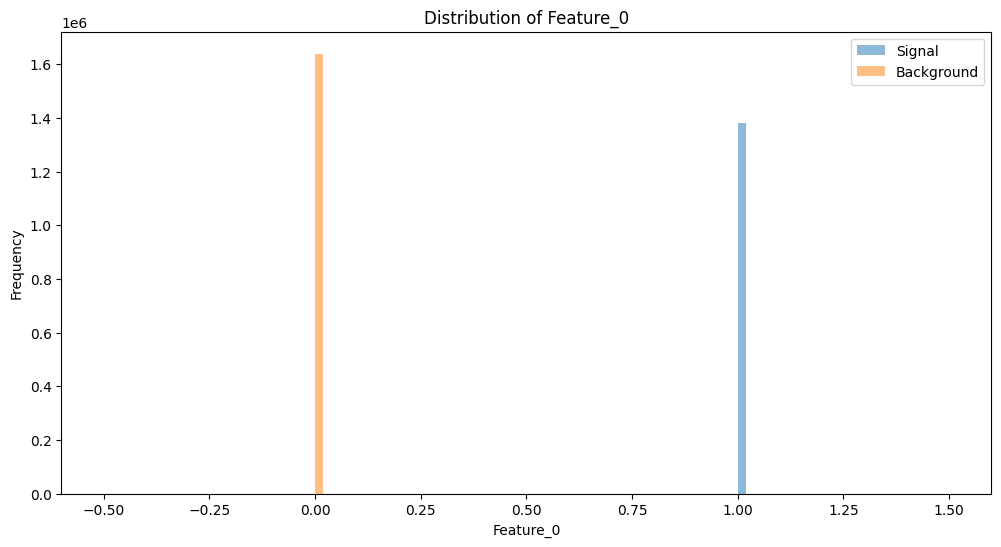

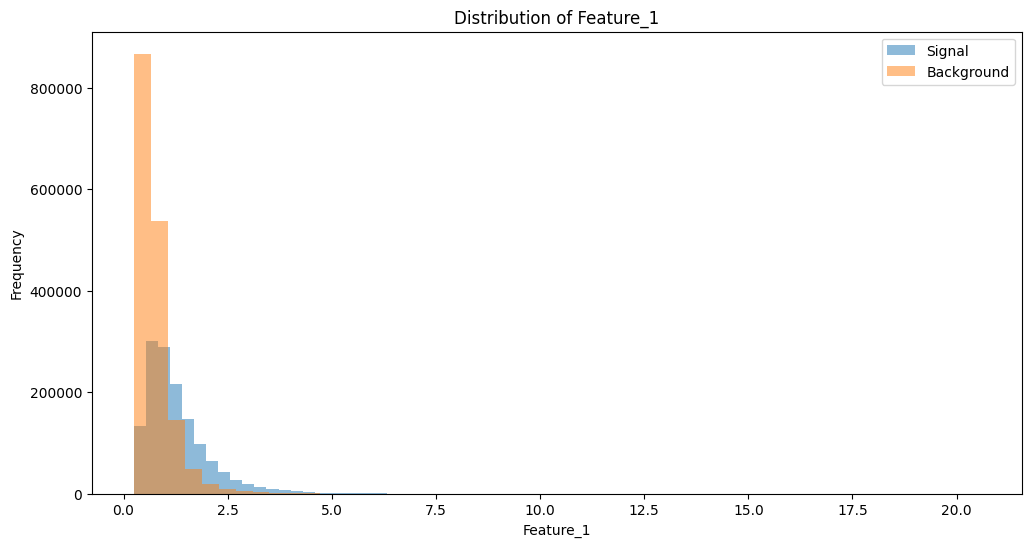

In [52]:
# 6.3 

signal.columns=['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18']
background.columns=['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18']

print("Feature_0 signal stats:")
print(signal['feature_0'].describe())
print("Feature_0 background stats:")
print(background['feature_0'].describe())

print("Feature_1 signal stats:")
print(signal['feature_1'].describe())
print("Feature_1 background stats:")
print(background['feature_1'].describe())

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(signal['feature_0'], bins=50, alpha=0.5, label="Signal")
plt.hist(background['feature_0'], bins=50, alpha=0.5, label="Background")
plt.title("Distribution of Feature_0")
plt.xlabel("Feature_0")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(signal['feature_1'], bins=50, alpha=0.5, label="Signal")
plt.hist(background['feature_1'], bins=50, alpha=0.5, label="Background")
plt.title("Distribution of Feature_1")
plt.xlabel("Feature_1")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



In [88]:
# 7.1 

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(signal, background, feature, label_signal=1, label_background=0):
    if feature not in signal.columns or feature not in background.columns:
        print(f"Error: '{feature}' not found.")
        return

    y_true=[label_signal]*len(signal)+[label_background]*len(background)
    y_scores=list(signal[feature])+list(background[feature])

    fpr, tpr, thresholds=roc_curve(y_true, y_scores, pos_label=label_signal)
    roc_auc=auc(fpr, tpr)

    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, color='skyblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Random classifier diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {feature}')
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc

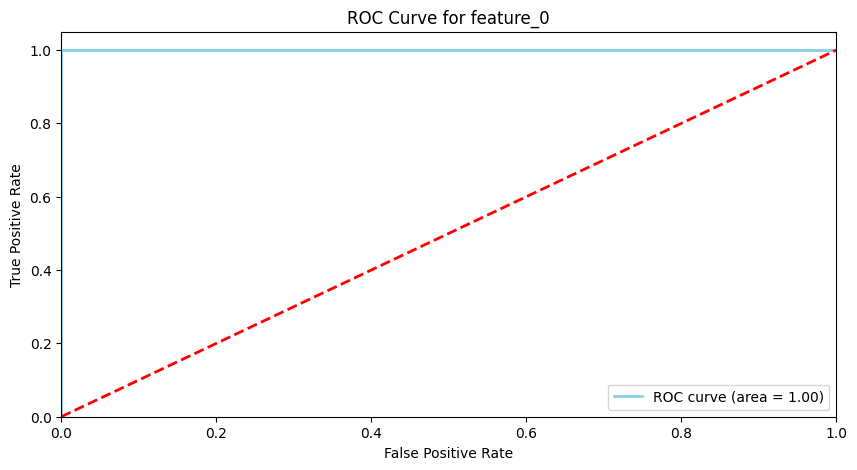

Calculated AUC: 1.0


In [89]:
# Testing 

auc_value=plot_roc_curve(signal, background, 'feature_0')
print(f"Calculated AUC: {auc_value}")


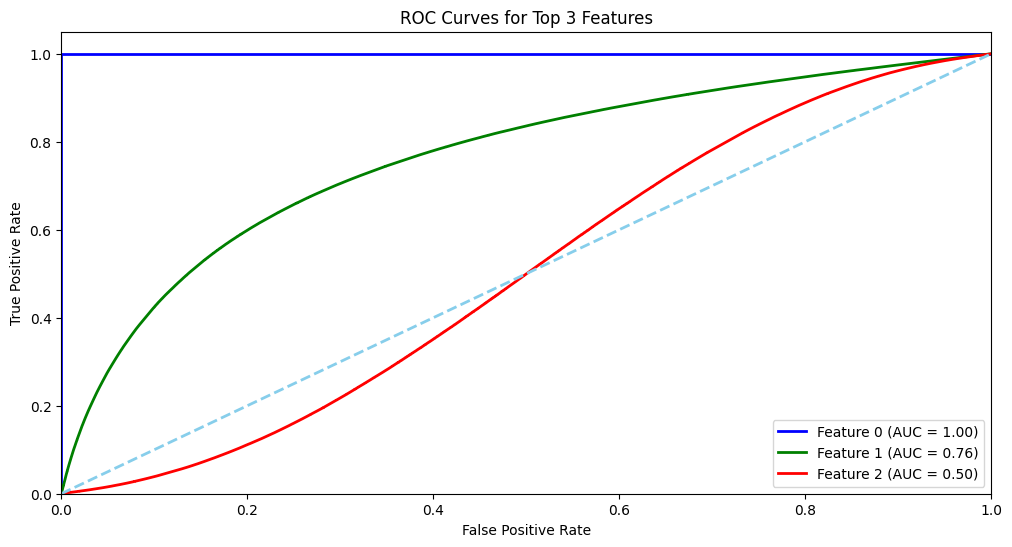

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd

y_true=[1]*len(signal)+[0]*len(background)

y_scores_0=pd.concat([signal['feature_0'], background['feature_0']])
y_scores_1=pd.concat([signal['feature_1'], background['feature_1']])
y_scores_2=pd.concat([signal['feature_2'], background['feature_2']])

fpr_0, tpr_0, _=roc_curve(y_true, y_scores_0)
roc_auc_0=auc(fpr_0, tpr_0)

fpr_1, tpr_1, _=roc_curve(y_true, y_scores_1)
roc_auc_1=auc(fpr_1, tpr_1)

fpr_2, tpr_2, _=roc_curve(y_true, y_scores_2)
roc_auc_2=auc(fpr_2, tpr_2)

plt.figure(figsize=(12, 6))
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'Feature 0 (AUC = {roc_auc_0:.2f})')
plt.plot(fpr_1, tpr_1, color='green', lw=2, label=f'Feature 1 (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_2, tpr_2, color='red', lw=2, label=f'Feature 2 (AUC = {roc_auc_2:.2f})')

plt.plot([0, 1], [0, 1], color='skyblue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Top 3 Features')
plt.legend(loc="lower right")
plt.show()

In [91]:
# 7.3 

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve_for_multiple_features(signal, background, features, label_signal=1, label_background=0):
    for feature in features:
        if feature not in signal.columns or feature not in background.columns:
            print(f"Error: '{feature}' not found.")
            continue
        
        print(f"Unique values in signal['{feature}']: {signal[feature].unique()}")
        print(f"Unique values in background['{feature}']: {background[feature].unique()}")
        
        y_true=[label_signal]*len(signal)+[label_background]*len(background)
        y_scores=list(signal[feature])+list(background[feature])

        print(f"Length of y_true: {len(y_true)}")
        print(f"Length of y_scores: {len(y_scores)}")

        print(f"NaN values in signal['{feature}']: {signal[feature].isna().sum()}")
        print(f"NaN values in background['{feature}']: {background[feature].isna().sum()}")

        fpr, tpr, thresholds=roc_curve(y_true, y_scores, pos_label=label_signal)
        roc_auc=auc(fpr, tpr)

        print(f"AUC for {feature}: {roc_auc}")

        plt.figure(figsize=(10, 5))
        plt.plot(fpr, tpr, color='skyblue', lw=2, label=f'ROC curve for {feature} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {feature}')
        plt.legend(loc="lower right")
        plt.show()

    return

Unique values in signal['feature_0']: [1.]
Unique values in background['feature_0']: [0.]
Length of y_true: 3022536
Length of y_scores: 3022536
NaN values in signal['feature_0']: 0
NaN values in background['feature_0']: 0
AUC for feature_0: 1.0


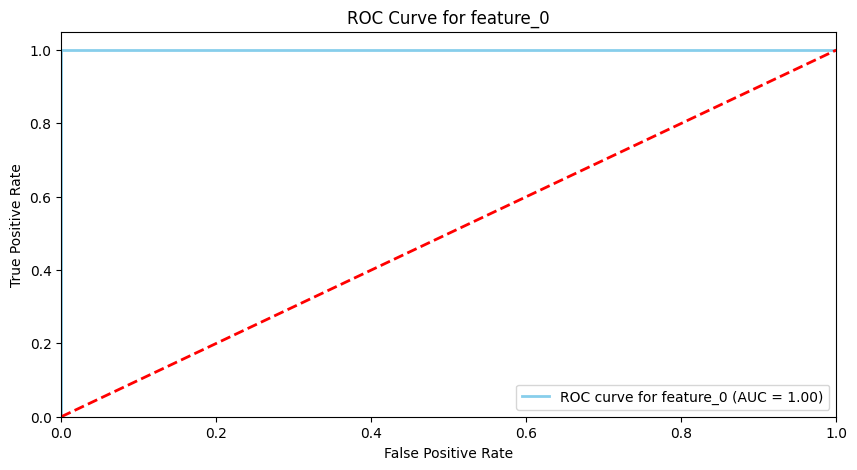

Unique values in signal['feature_1']: [1.66797304 0.44483992 0.38125607 ... 0.80216217 1.22379899 0.39349034]
Unique values in background['feature_1']: [0.97286147 0.45639819 0.43781763 ... 1.05772483 0.35827321 0.98063868]
Length of y_true: 3022536
Length of y_scores: 3022536
NaN values in signal['feature_1']: 0
NaN values in background['feature_1']: 0
AUC for feature_1: 0.7624408276774974


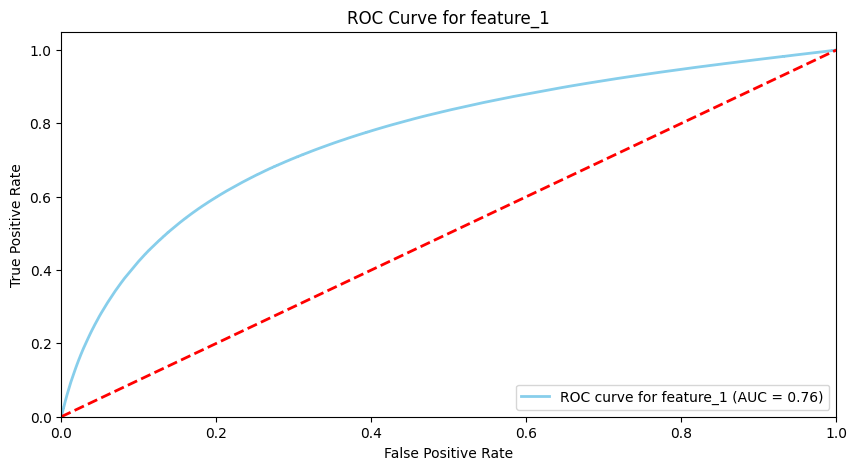

Unique values in signal['feature_2']: [ 0.06419062 -0.13429801 -0.97614539 ... -0.54075003  0.40429002
  0.74342018]
Unique values in background['feature_2']: [ 0.65385455  1.09937119 -1.1198827  ...  0.62362957 -0.47372928
 -0.70310849]
Length of y_true: 3022536
Length of y_scores: 3022536
NaN values in signal['feature_2']: 0
NaN values in background['feature_2']: 0
AUC for feature_2: 0.4998175187263502


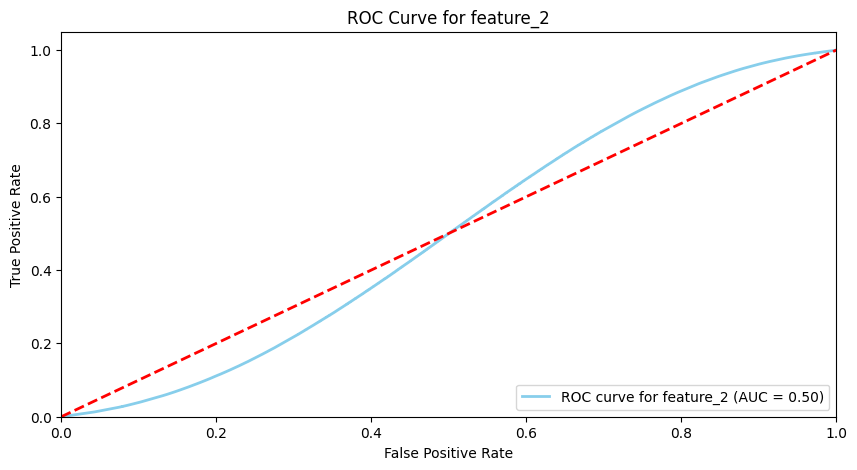

Unique values in signal['feature_3']: [-1.22517145 -0.70997161  0.69315231 ...  0.04657334  0.03576948
 -0.1487872 ]
Unique values in background['feature_3']: [ 1.17622459  1.51245344 -1.33682251 ... -1.28854287  0.60015482
  0.97441435]
Length of y_true: 3022536
Length of y_scores: 3022536
NaN values in signal['feature_3']: 0
NaN values in background['feature_3']: 0
AUC for feature_3: 0.49970445273347


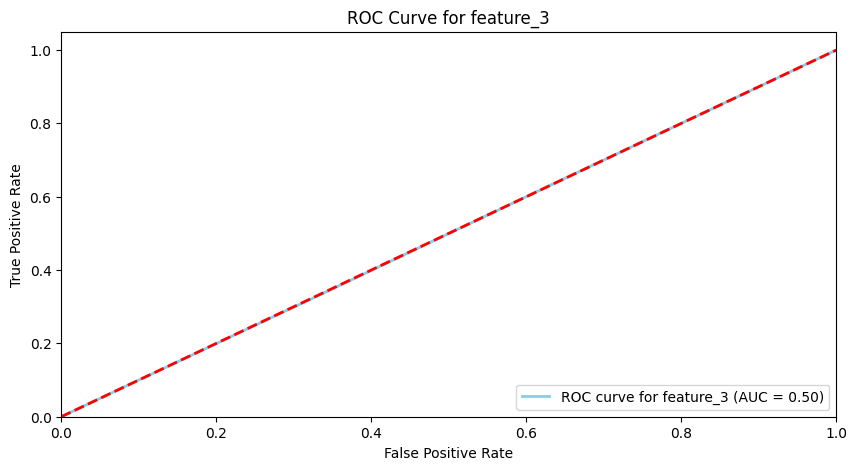

In [92]:
# Testing 
features = ['feature_0', 'feature_1', 'feature_2', 'feature_3']  

plot_roc_curve_for_multiple_features(signal, background, features)

AUC for feature_0: 1.0


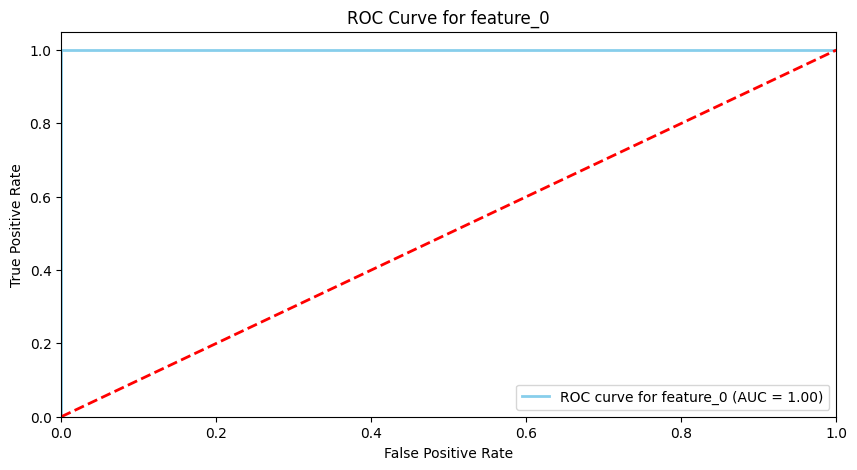

AUC for feature_1: 0.7624408276774974


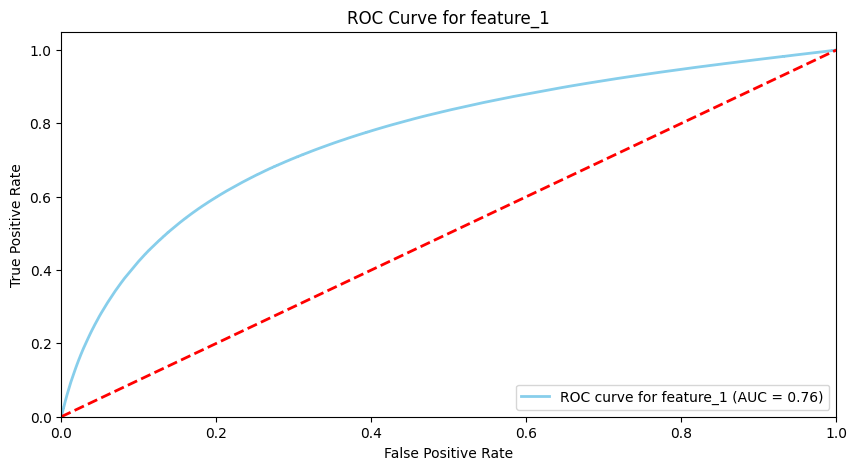

AUC for feature_2: 0.4998175187263502


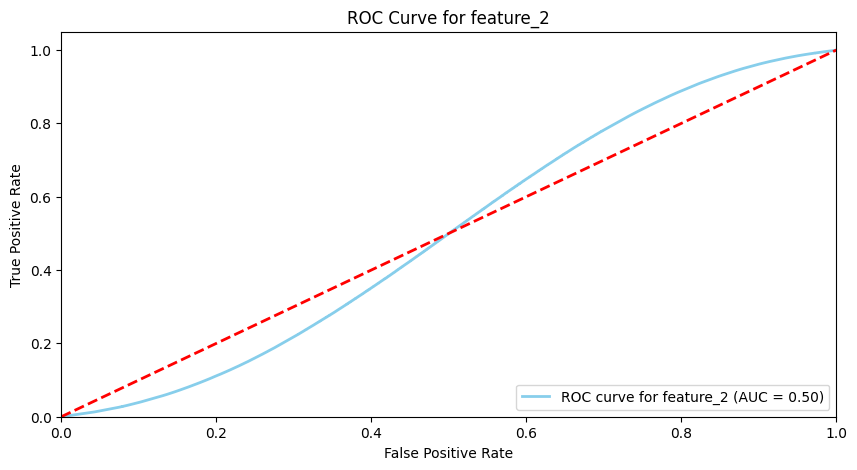

AUC for feature_3: 0.49970445273347


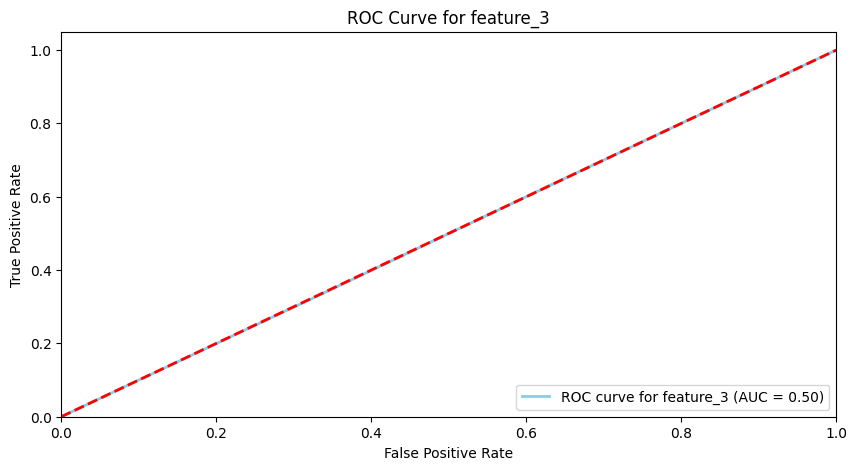


Best feature based on AUC: feature_0 with AUC = 1.00

AUC Scores for all Features:
feature_0: 1.00
feature_1: 0.76
feature_2: 0.50
feature_3: 0.50


In [94]:
#7.4 

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def compare_auc_across_features(signal, background, features, label_signal=1, label_background=0):
    auc_scores={} 

    for feature in features:
        if feature not in signal.columns or feature not in background.columns:
            print(f"Error: '{feature}' not found.")
            continue

        y_true=[label_signal]*len(signal)+[label_background]*len(background)
        y_scores=list(signal[feature])+list(background[feature])

        fpr, tpr, thresholds=roc_curve(y_true, y_scores, pos_label=label_signal)
        roc_auc=auc(fpr, tpr)

        auc_scores[feature]=roc_auc

        print(f"AUC for {feature}: {roc_auc}")

        plt.figure(figsize=(10, 5))
        plt.plot(fpr, tpr, color='skyblue', lw=2, label=f'ROC curve for {feature} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {feature}')
        plt.legend(loc="lower right")
        plt.show()

    best_feature=max(auc_scores, key=auc_scores.get)
    best_auc=auc_scores[best_feature]

    print(f"\nBest feature based on AUC: {best_feature} with AUC = {best_auc:.2f}")

    return auc_scores, best_feature, best_auc

features=['feature_0', 'feature_1', 'feature_2', 'feature_3']  

auc_scores, best_feature, best_auc = compare_auc_across_features(signal, background, features)

print("\nAUC Scores for all Features:")
for feature, auc_score in auc_scores.items():
    print(f"{feature}: {auc_score:.2f}")


## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [11]:
import pandas as pd

df=pd.read_csv('SUSY.csv')

signal=df[df.iloc[:, 0]==1] 
background=df[df.iloc[:, 0]==0] 

signal_data = signal.drop(signal.columns[0], axis=1)
background_data = background.drop(background.columns[0], axis=1)

signal_mean=signal_data.mean()
background_mean=background_data.mean()

signal_cov=signal_data.cov()
background_cov=background_data.cov()

print("Signal Mean Vector (First 5 features):")
print(signal_mean.head())

print("\nSignal Covariance Matrix (Top-left 5x5):")
print(signal_cov.iloc[:5, :5])  

print("\nBackground Mean Vector (First 5 features):")
print(background_mean.head()) 

print("\nBackground Covariance Matrix (Top-left 5x5):")
print(background_cov.iloc[:5, :5])  


Signal Mean Vector (First 5 features):
9.728614687919616699e-01     1.290448
6.538545489311218262e-01    -0.000266
1.176224589347839355e+00    -0.000849
1.157156467437744141e+00     1.138180
-1.739873170852661133e+00    0.001042
dtype: float64

Signal Covariance Matrix (Top-left 5x5):
                           9.728614687919616699e-01  6.538545489311218262e-01  \
9.728614687919616699e-01                   0.647009                 -0.000717   
6.538545489311218262e-01                  -0.000717                  0.747902   
1.176224589347839355e+00                  -0.000051                 -0.001312   
1.157156467437744141e+00                   0.365621                 -0.000984   
-1.739873170852661133e+00                 -0.001144                  0.268223   

                           1.176224589347839355e+00  1.157156467437744141e+00  \
9.728614687919616699e-01                  -0.000051                  0.365621   
6.538545489311218262e-01                  -0.001312              

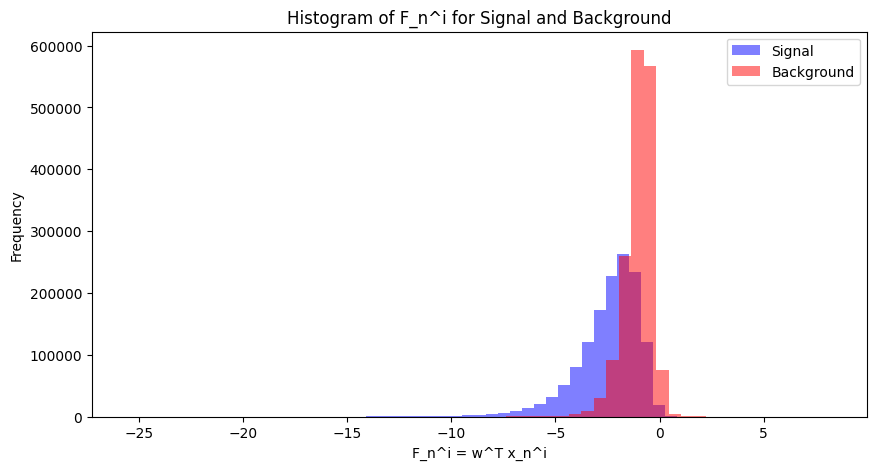

In [13]:
# 8.2 

import numpy as np
import matplotlib.pyplot as plt

Sw=(signal_cov + background_cov)/2

m2_minus_m1=background_mean-signal_mean

Sw_inv=np.linalg.inv(Sw)  
w=np.dot(Sw_inv, m2_minus_m1)

signal_F=np.dot(signal_data, w)
background_F=np.dot(background_data, w)

plt.figure(figsize=(10, 5))
plt.hist(signal_F, bins=50, alpha=0.5, label='Signal', color='b')
plt.hist(background_F, bins=50, alpha=0.5, label='Background', color='r')
plt.xlabel('F_n^i = w^T x_n^i')
plt.ylabel('Frequency')
plt.title('Histogram of F_n^i for Signal and Background')
plt.legend(loc='upper right')
plt.show()



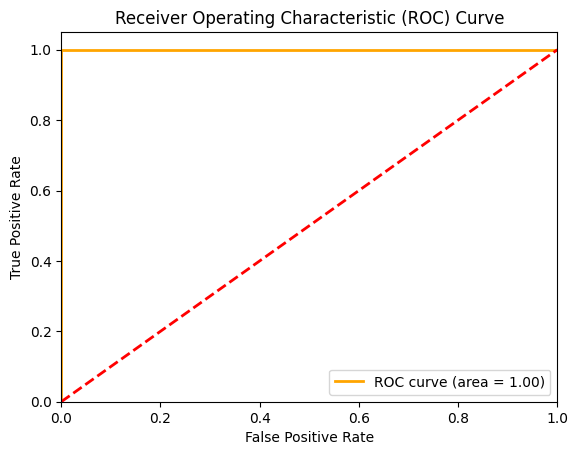

In [18]:
# 8.3 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

F_signal=np.array([1.2, 2.3, 3.4]) 
F_background=np.array([0.1, 0.2, 0.3]) 

true_labels=np.concatenate([np.ones(len(F_signal)), np.zeros(len(F_background))])

F_n_values=np.concatenate([F_signal, F_background])

fpr, tpr, thresholds=roc_curve(true_labels, F_n_values)

roc_auc=auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

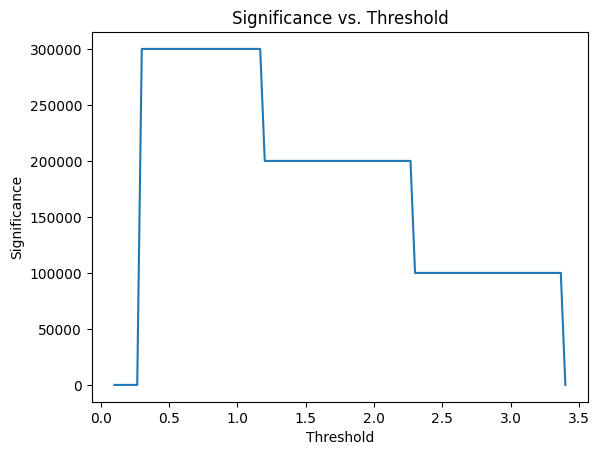

Maximal Significance: 300000.0 at threshold 0.30000000000000004


In [20]:
# 8.4 

import numpy as np
import matplotlib.pyplot as plt

significance_values=[]

thresholds = np.linspace(min(F_n_values), max(F_n_values), 100)

for threshold in thresholds:
    predictions=(F_n_values>threshold).astype(int)
    
    TP=np.sum((predictions==1) & (true_labels==1))
    FP=np.sum((predictions==1) & (true_labels==0))
    
    significance=TP/np.sqrt(FP+1e-10) 
    significance_values.append(significance)

max_significance=max(significance_values)
best_threshold=thresholds[np.argmax(significance_values)]

plt.plot(thresholds, significance_values)
plt.xlabel('Threshold')
plt.ylabel('Significance')
plt.title('Significance vs. Threshold')
plt.show()

print(f"Maximal Significance: {max_significance} at threshold {best_threshold}")
